In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('Job_Placement_Data.csv')

In [4]:
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [5]:
gen = pd.get_dummies(df['gender'],drop_first = True)
hsc_sub = pd.get_dummies(df['hsc_subject'],drop_first=True)
ug = pd.get_dummies(df['undergrad_degree'],drop_first=True)
exp = pd.get_dummies(df['work_experience'],drop_first=True)
special = pd.get_dummies(df['specialisation'],drop_first=True)

In [6]:
df = df.drop(['gender','hsc_subject','undergrad_degree','work_experience','ssc_board','hsc_board','specialisation'],axis=1)
df = pd.concat([gen,hsc_sub,ug,exp,special,df],axis=1)
df

,M,Commerce,Science,Others,Sci&Tech,Yes,Mkt&HR,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,status
0,1,1,0,0,1,0,1,67.00,91.00,58.00,55.0,58.80,Placed
1,1,0,1,0,1,1,0,79.33,78.33,77.48,86.5,66.28,Placed
2,1,0,0,0,0,0,0,65.00,68.00,64.00,75.0,57.80,Placed
3,1,0,1,0,1,0,1,56.00,52.00,52.00,66.0,59.43,Not Placed
4,1,1,0,0,0,0,0,85.80,73.60,73.30,96.8,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,1,0,0,0,0,0,80.60,82.00,77.60,91.0,74.49,Placed
211,1,0,1,0,1,0,0,58.00,60.00,72.00,74.0,53.62,Placed
212,1,1,0,0,0,1,0,67.00,67.00,73.00,59.0,69.72,Placed
213,0,1,0,0,0,0,1,74.00,66.00,58.00,70.0,60.23,Placed


In [7]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=30)

## Pre Pruning

In [9]:
parameter = {
    'criterion':['gini','entropy','log_loss'],
    'splitter': ['best','random'],
    'max_depth':[1,2,3,4,5,6],
    'max_features':['auto','sqrt','log2']
}

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
treemodel = DecisionTreeClassifier()
classifier = GridSearchCV(treemodel,param_grid = parameter,cv =5,scoring='accuracy')

In [11]:
classifier.fit(X_train,y_train)

C:\Users\abhi9\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\abhi9\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abhi9\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\abhi9\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [12]:
classifier.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'random'}

In [13]:
treeModel = DecisionTreeClassifier(criterion='gini',max_depth= 4,max_features= 'log2',splitter='random')

In [14]:
treeModel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features='log2', splitter='random')

In [15]:
y_pred = treeModel.predict(X_test)

[Text(0.5869565217391305, 0.9, 'X[3] <= 0.349\ngini = 0.415\nsamples = 150\nvalue = [44, 106]'),
 Text(0.34782608695652173, 0.7, 'X[7] <= 58.973\ngini = 0.394\nsamples = 141\nvalue = [38, 103]'),
 Text(0.17391304347826086, 0.5, 'X[5] <= 0.603\ngini = 0.355\nsamples = 26\nvalue = [20, 6]'),
 Text(0.08695652173913043, 0.3, 'X[8] <= 50.977\ngini = 0.255\nsamples = 20\nvalue = [17, 3]'),
 Text(0.043478260869565216, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.13043478260869565, 0.1, 'gini = 0.337\nsamples = 14\nvalue = [11, 3]'),
 Text(0.2608695652173913, 0.3, 'X[6] <= 0.962\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.21739130434782608, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.30434782608695654, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5217391304347826, 0.5, 'X[5] <= 0.753\ngini = 0.264\nsamples = 115\nvalue = [18, 97]'),
 Text(0.43478260869565216, 0.3, 'X[6] <= 0.559\ngini = 0.368\nsamples = 70\nvalue = [17, 53]'),
 Text(0.391304347826

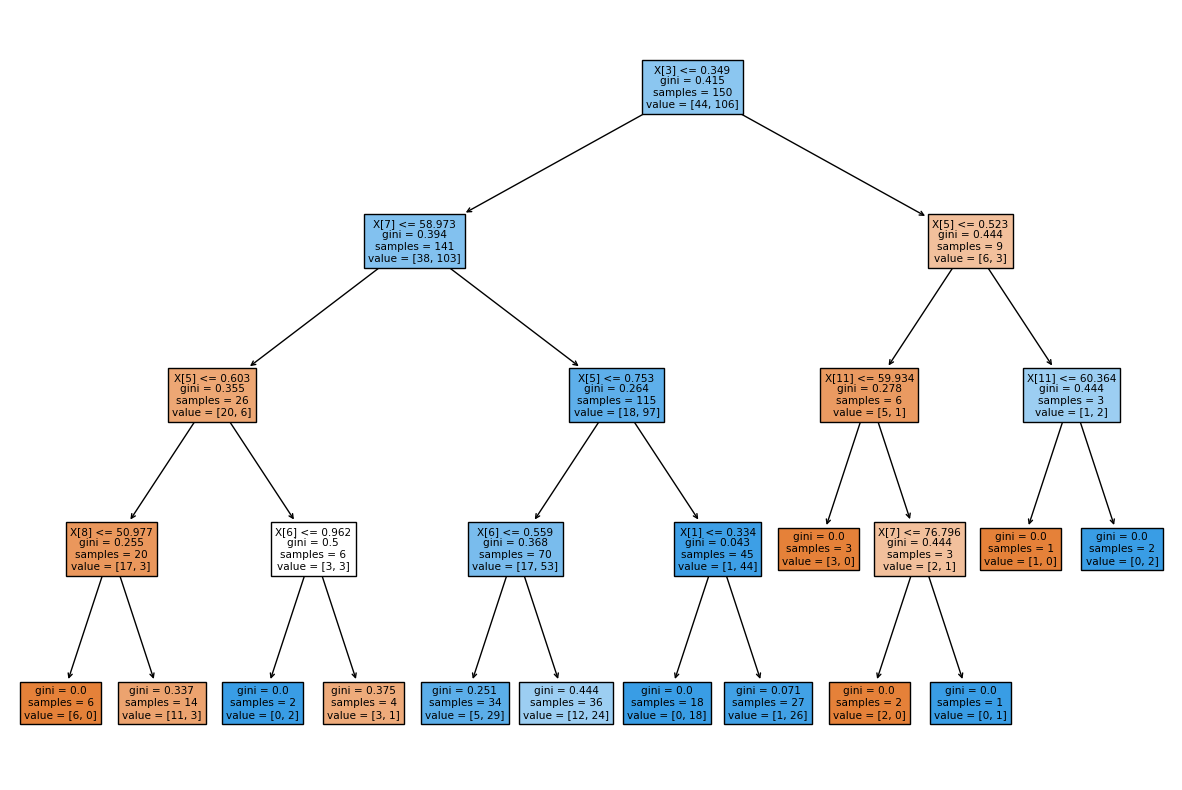

In [16]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeModel,filled=True)

In [17]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_pred,y_test))

0.7538461538461538


In [18]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

  Not Placed       0.48      0.73      0.58        15
      Placed       0.90      0.76      0.83        50

    accuracy                           0.75        65
   macro avg       0.69      0.75      0.70        65
weighted avg       0.81      0.75      0.77        65

